In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv("telco_customer.csv")
df.sample(3)
drop_class = ['customerID','InternetService','Contract','PaymentMethod']
for col in drop_class:
  df = df.drop(col,axis='columns')
df.sample(3)
len(df.columns)
df.columns
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,No,Yes,No,No,No,No,Yes,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,Yes,No,Yes,No,No,No,No,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,Yes,Yes,No,No,No,No,Yes,53.85,108.15,Yes


In [25]:
for column in df:
  print(f'{column}: {df[column].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
PaperlessBilling: ['Yes' 'No']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [69]:
df.replace({'Female':1,'Male':0},inplace=True)
col_yes_no = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
              'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in col_yes_no:
  df[col].replace('Yes',1,inplace=True)
  df[col].replace('No',0,inplace=True)
df.info()
for col in df:
  print(f'{col}: {df[col].unique()}')
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  PaperlessBilling  7043 non-null   int64  
 14  MonthlyCharges    7043 non-null   float64
 15  TotalCharges      7043 non-null   object 
 16  Churn             7043 non-null   int64  


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,0,1,0,0,0,0,1,29.85,29.85,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.5,0
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1


In [70]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,0,1,0,0,0,0,1,29.85,29.85,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.5,0
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1


In [74]:
help_class = ['OnlineSecurity','OnlineBackup','DeviceProtection',
              'TechSupport','StreamingTV','StreamingMovies']
for col in help_class:
  df[col].replace({'No internet service':0},inplace=True)
df['MultipleLines'].replace({'No phone service':0},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   OnlineSecurity    7043 non-null   int64  
 8   OnlineBackup      7043 non-null   int64  
 9   DeviceProtection  7043 non-null   int64  
 10  TechSupport       7043 non-null   int64  
 11  StreamingTV       7043 non-null   int64  
 12  StreamingMovies   7043 non-null   int64  
 13  PaperlessBilling  7043 non-null   int64  
 14  MonthlyCharges    7043 non-null   float64
 15  TotalCharges      7043 non-null   object 
 16  Churn             7043 non-null   int64  


In [75]:
for col in df.columns:
  print(f'{col}: {df[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: [0 1]


In [80]:
df1 = df[df['TotalCharges']!=' ']
df1['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [81]:
help_class = ['tenure','MonthlyCharges','TotalCharges']
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
df1[help_class] = scaler.fit_transform(df1[help_class])

<ipython-input-81-4fff87f82ef4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[help_class] = scaler.fit_transform(df1[help_class])


In [83]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   float64
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   OnlineSecurity    7032 non-null   int64  
 8   OnlineBackup      7032 non-null   int64  
 9   DeviceProtection  7032 non-null   int64  
 10  TechSupport       7032 non-null   int64  
 11  StreamingTV       7032 non-null   int64  
 12  StreamingMovies   7032 non-null   int64  
 13  PaperlessBilling  7032 non-null   int64  
 14  MonthlyCharges    7032 non-null   float64
 15  TotalCharges      7032 non-null   float64
 16  Churn             7032 non-null   int64  


In [84]:
df1.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0
1,0,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0
2,0,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1
3,0,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0
4,1,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1


In [86]:
x = df1.drop('Churn',axis='columns')
y = df1['Churn']

In [91]:
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=False)

In [149]:
def ann(x_test,y_test,count):
  model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(len(x_test.columns),),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
  ])
  model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
  )
  model.fit(x_train,y_train,epochs=count)
  return model

In [95]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.7918


[0.44817250967025757, 0.7917554974555969]

In [98]:
predict = model.predict(x_test)

44/44 [==============================] - 0s 1ms/step


In [103]:
predict
y_predict = []
for i in predict:
  if i < 0.5:
    y_predict.append(0)
  else:
    y_predict.append(1)
len(y_predict)

1407

In [104]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1026
           1       0.66      0.47      0.55       381

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Text(58.222222222222214, 0.5, 'Truth')

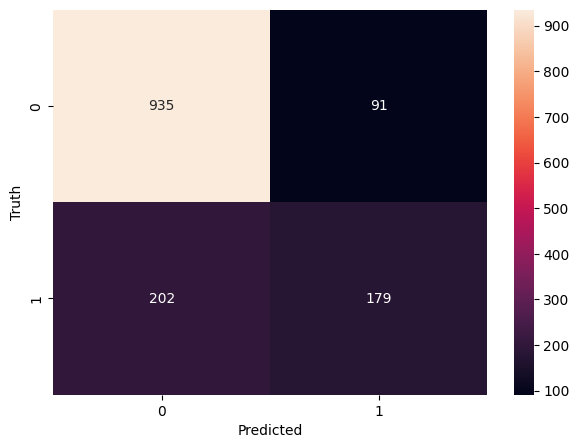

In [106]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict)

plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

**Now we will use undersampling method to avoid bias toward one class**

In [121]:
y.value_counts()
# df1['Churn'].value_counts()
df1_0 = df1[df1['Churn']==0]
df_1 = df1[df1['Churn']==1]
df_new = df1_0.sample(df_1.shape[0])
df_new.shape
df_1.shape

(1869, 17)

In [123]:
#now we have undersamppled df_new with 1869 entry for value equal 0
df_final = pd.concat([df_new,df_1],axis=0)
df_final.shape

(3738, 17)

In [142]:
x1 = df_final.drop('Churn',axis='columns')
y1 = df_final['Churn']

x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=42,shuffle=True)

In [143]:
model = ann(x_train,y_train,50)

Epoch 1/50
94/94 [==============================] - 1s 2ms/step - loss: 0.6589 - accuracy: 0.6140
Epoch 2/50
94/94 [==============================] - 0s 2ms/step - loss: 0.5669 - accuracy: 0.7191
Epoch 3/50
94/94 [==============================] - 0s 2ms/step - loss: 0.5381 - accuracy: 0.7341
Epoch 4/50
94/94 [==============================] - 0s 2ms/step - loss: 0.5237 - accuracy: 0.7418
Epoch 5/50
94/94 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.7472
Epoch 6/50
94/94 [==============================] - 0s 2ms/step - loss: 0.5128 - accuracy: 0.7522
Epoch 7/50
94/94 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.7559
Epoch 8/50
94/94 [==============================] - 0s 2ms/step - loss: 0.5067 - accuracy: 0.7525
Epoch 9/50
94/94 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.7542
Epoch 10/50
94/94 [==============================] - 0s 2ms/step - loss: 0.5014 - accuracy: 0.7569
Epoch 11/50
94/94 [

In [144]:
model.evaluate(x_test,y_test)

24/24 [==============================] - 0s 3ms/step - loss: 0.5145 - accuracy: 0.7460


[0.5145233273506165, 0.7459893226623535]

In [145]:
predict = model.predict(x_test)

24/24 [==============================] - 0s 1ms/step


In [146]:
y_predict = []
for i in predict:
  if i < 0.5:
    y_predict.append(0)
  else:
    y_predict.append(1)
y_predict[0]

1

In [147]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       379
           1       0.73      0.78      0.75       369

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



Text(58.222222222222214, 0.5, 'Truth')

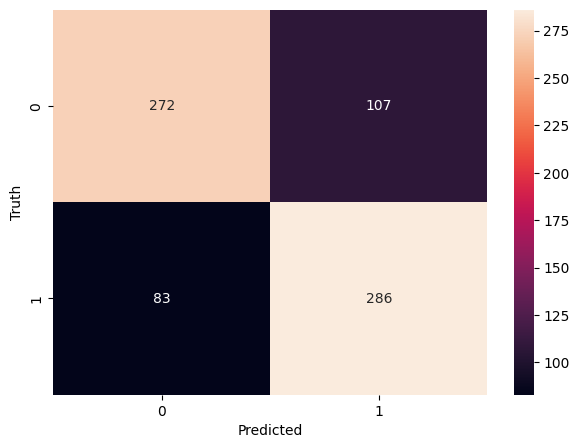

In [148]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict)

plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

**Now we call see fro confusion matrix that both class have same amount of predictions**

**Now we will se oversampling of the minority class by duplicating it using sample(replace=True)**

In [154]:
y.value_counts()
# df1['Churn'].value_counts()
df1_0 = df1[df1['Churn']==0]
df_1 = df1[df1['Churn']==1]
df_new = df1_0.sample(df_1.shape[0])
df_new.shape
df_1.shape

df_final = pd.concat([df1_0,df_1.sample(df1_0.shape[0],replace=True)],axis=0)
df_final.shape[0]

10326

In [158]:
x1 = df_final.drop('Churn',axis='columns')
y1 = df_final['Churn']

x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=42,shuffle=True,stratify=y1)

In [159]:
model = ann(x_train,y_train,50)

Epoch 1/50
259/259 [==============================] - 2s 4ms/step - loss: 0.6104 - accuracy: 0.6695
Epoch 2/50
259/259 [==============================] - 1s 3ms/step - loss: 0.5224 - accuracy: 0.7456
Epoch 3/50
259/259 [==============================] - 1s 3ms/step - loss: 0.5086 - accuracy: 0.7521
Epoch 4/50
259/259 [==============================] - 1s 3ms/step - loss: 0.5013 - accuracy: 0.7542
Epoch 5/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4976 - accuracy: 0.7562
Epoch 6/50
259/259 [==============================] - 1s 2ms/step - loss: 0.4947 - accuracy: 0.7582
Epoch 7/50
259/259 [==============================] - 1s 2ms/step - loss: 0.4929 - accuracy: 0.7611
Epoch 8/50
259/259 [==============================] - 0s 2ms/step - loss: 0.4909 - accuracy: 0.7615
Epoch 9/50
259/259 [==============================] - 1s 2ms/step - loss: 0.4881 - accuracy: 0.7648
Epoch 10/50
259/259 [==============================] - 0s 2ms/step - loss: 0.4883 - accuracy: 0.7607

In [160]:
model.evaluate(x_test)

65/65 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [161]:
predict = model.predict(x_test)
y_predict = []
for i in predict:
  if i < 0.5:
    y_predict.append(0)
  else:
    y_predict.append(1)

65/65 [==============================] - 1s 5ms/step


In [162]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1033
           1       0.75      0.78      0.76      1033

    accuracy                           0.76      2066
   macro avg       0.76      0.76      0.76      2066
weighted avg       0.76      0.76      0.76      2066



Text(58.222222222222214, 0.5, 'Truth')

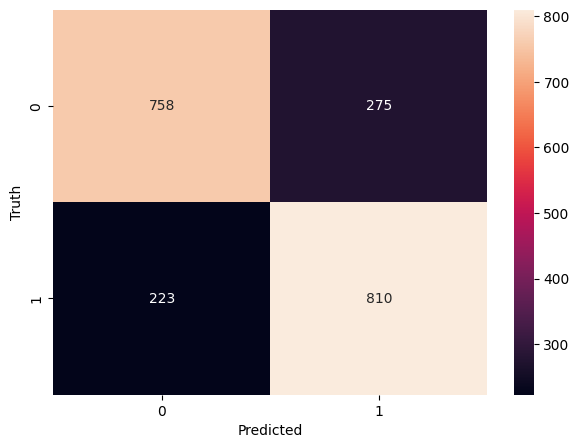

In [163]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict)

plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

**SMOTE**

**SMOTE - Uses Knn algo to create new data points it is not duplicate**


In [166]:
x = df1.drop('Churn',axis='columns')
y = df1['Churn']
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm,y_sm = smote.fit_resample(x,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [167]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=42,shuffle=True,stratify=y_sm)

In [169]:
model = ann(x_train,y_train,50)

Epoch 1/50
259/259 [==============================] - 3s 5ms/step - loss: 0.5896 - accuracy: 0.6961
Epoch 2/50
259/259 [==============================] - 1s 4ms/step - loss: 0.5134 - accuracy: 0.7558
Epoch 3/50
259/259 [==============================] - 1s 4ms/step - loss: 0.4955 - accuracy: 0.7645
Epoch 4/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4854 - accuracy: 0.7708
Epoch 5/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4793 - accuracy: 0.7754
Epoch 6/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4752 - accuracy: 0.7728
Epoch 7/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4707 - accuracy: 0.7760
Epoch 8/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4689 - accuracy: 0.7763
Epoch 9/50
259/259 [==============================] - 1s 4ms/step - loss: 0.4659 - accuracy: 0.7797
Epoch 10/50
259/259 [==============================] - 1s 3ms/step - loss: 0.4647 - accuracy: 0.7800

In [170]:
model.evaluate(x_test,y_test)
predict = model.predict(x_test)

65/65 [==============================] - 0s 2ms/step


In [171]:
y_predict = []
for i in predict:
  if i < 0.5:
    y_predict.append(0)
  else:
    y_predict.append(1)


In [172]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1033
           1       0.76      0.82      0.79      1033

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



Text(58.222222222222214, 0.5, 'Truth')

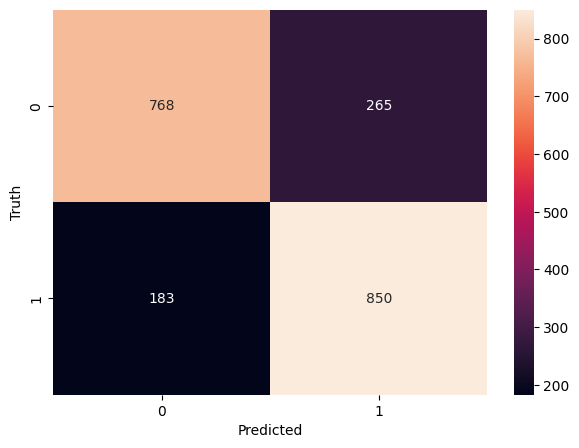

In [173]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict)

plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")